In [ ]:
# activate R magic
%load_ext rpy2.ipython

#**Classificação KNN em R** - Problema de Classificação Binária



##Prevendo o resultado do índice Standard & Poor's 500

In [ ]:
# Obs: Caso tenha problemas com a acentuação, consulte este link:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

In [ ]:
%%R
# Instalando os pacotes
install.packages("ISLR")
install.packages("caret")
install.packages("e1071")
library(ISLR)
library(caret)
library(e10721)

In [3]:
%%R
# Definindo o seed
set.seed(300)

## Carregando e Explorando Dataset

In [4]:
%%R
# Resumo geral do dataset
?Smarket
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [5]:
%%R
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [6]:
%%R
head(Smarket)

  Year   Lag1   Lag2   Lag3   Lag4   Lag5 Volume  Today Direction
1 2001  0.381 -0.192 -2.624 -1.055  5.010 1.1913  0.959        Up
2 2001  0.959  0.381 -0.192 -2.624 -1.055 1.2965  1.032        Up
3 2001  1.032  0.959  0.381 -0.192 -2.624 1.4112 -0.623      Down
4 2001 -0.623  1.032  0.959  0.381 -0.192 1.2760  0.614        Up
5 2001  0.614 -0.623  1.032  0.959  0.381 1.2057  0.213        Up
6 2001  0.213  0.614 -0.623  1.032  0.959 1.3491  1.392        Up


In [ ]:
%%R
#View(Smarket)

##Split dataset em Treino e Teste

In [8]:
%%R
?createDataPartition # Função do pacote {caret} similar ao train_test_split() em Python
# y: variável "Direction"
# p: proporção da divisão dos dados
# false: não desejamos formato de lista

# Um índice é criado a partir da função abaixo
indxTrain <- createDataPartition(y = Smarket$Direction, 
                                 p = 0.75,
                                 list = FALSE)
#View(indxTrain)

In [9]:
%%R

#usar índice para extrair os dados de treino
dados_treino <- Smarket[indxTrain,] # retornar apenas linhas que contenham esse índice, retornar todas as colunas

#usar a diferença do índice para extrair dados de teste
dados_teste <- Smarket[-indxTrain,] # retornar apenas linhas que não contenham esse índice, retornar todas as colunas


In [10]:
%%R
class(dados_treino)

[1] "data.frame"


In [14]:
%%R
str(dados_treino)

'data.frame':	938 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [11]:
%%R
class(dados_teste)

[1] "data.frame"


In [13]:
%%R
str(dados_teste)

'data.frame':	312 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  -0.498 -0.218 -0.568 -4.318 -1.246 ...
 $ Lag2     : num  0.287 -0.865 0.104 -2.476 1.078 ...
 $ Lag3     : num  1.303 1.183 -1.431 0.226 -0.463 ...
 $ Lag4     : num  0.027 -1.334 -0.766 0.645 -2.443 ...
 $ Lag5     : num  -0.403 -0.623 1.749 0.998 2.557 ...
 $ Volume   : num  1.26 1.15 1.29 1.23 1.25 ...
 $ Today    : num  -0.189 0.812 0.586 1.483 -3.439 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 2 2 2 1 1 2 1 2 1 ...


##Verificando a distribuição dos dados originais e das partições


Ao trabalhar com classificação devemos tomar o cuidado p/ que os dados estejam com as **classes balanceadas**. 

In [15]:
%%R
# Essa função calcula uma tabela de proporção 

# Neste caso pegamos a variável Direction(y), multiplicando por 100 p/ retornar o valor percentual
prop.table(table(Smarket$Direction)) * 100

# 48% dos registros conjunto de dados original pertence à classe Down
# 52% dos registros conjunto de dados original pertence à classe Up
# Dataset praticamente balanceado


 Down    Up 
48.16 51.84 


In [16]:
%%R

# Temos praticamente a mesma distribuição 
# O balanceamento que temos nos dados originais continua existindo nos dados de treino e teste
prop.table(table(dados_treino$Direction)) * 100


    Down       Up 
48.18763 51.81237 


## Correlação entre as variáveis **preditoras** - como as variáveis **X** estão relacionadas

In [17]:
%%R

# conjunto de dados de treino, pego todas as colunas exceto "Direction". 
# abre e fecha colchetes é a notação de slicing/indexação/fatiamento

scrCor <- cor(dados_treino[,names(dados_treino) != "Direction"]) # Retornar todas as linhas, retorar os nomes da coluna dados_treino diferente "Direction"
descrCor

              Year         Lag1         Lag2         Lag3        Lag4
Year   1.000000000  0.006301405  0.005857983  0.037095808  0.03339245
Lag1   0.006301405  1.000000000 -0.016854134  0.026741186  0.02296069
Lag2   0.005857983 -0.016854134  1.000000000 -0.001642703  0.00401454
Lag3   0.037095808  0.026741186 -0.001642703  1.000000000 -0.03783322
Lag4   0.033392448  0.022960693  0.004014540 -0.037833222  1.00000000
Lag5   0.024529488 -0.004112747 -0.024984509 -0.037495551 -0.03205524
Volume 0.547778306  0.000165199 -0.072393496 -0.014219428 -0.02749414
Today  0.040808070  0.011363546  0.003901825 -0.013189840 -0.01452663
               Lag5       Volume        Today
Year    0.024529488  0.547778306  0.040808070
Lag1   -0.004112747  0.000165199  0.011363546
Lag2   -0.024984509 -0.072393496  0.003901825
Lag3   -0.037495551 -0.014219428 -0.013189840
Lag4   -0.032055236 -0.027494142 -0.014526634
Lag5    1.000000000 -0.008358187 -0.015248038
Volume -0.008358187  1.000000000  0.018672777
To

## Normalização dos Dados (Center e Scale)

- A transformação **"scale"** calcula o desvio padrão para um atributo e divide cada valor por esse desvio padrão.


- A transformação **"center"** calcula a média de um atributo e a subtrai de cada valor.


##Normalização

In [18]:
%%R
# Função de Normalização
scale.features <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- scale(df[[variable]], center = T, scale = T)
  }
  return(df)
}

##Removendo a variável target dos Dados Treino e Teste

In [20]:
%%R

# Do dataset de Treino - Retornar todas as colunas, exceto "Direction"
numeric.vars_treino <- colnames(treinoX <- dados_treino[,names(dados_treino) != "Direction"])

# Do dataset de Teste - Retornar todas as colunas, exceto "Direction"
numeric.vars_teste <- colnames(testeX <- dados_teste[,names(dados_teste) != "Direction"])

## Aplicando normalização às variáveis preditoras de Treino e Teste


In [22]:
%%R

dados_treino_scaled <- scale.features(dados_treino, numeric.vars_treino)

dados_teste_scaled <- scale.features(dados_teste, numeric.vars_teste)

In [23]:
%%R
#View(dados_treino_scaled)
head(dados_treino_scaled)

       Year       Lag1       Lag2       Lag3       Lag4       Lag5     Volume
1 -1.407243  0.3179143 -0.1931838 -2.2377786 -0.9277828  4.3033729 -0.7885484
2 -1.407243  0.8196542  0.3181643 -0.1524564 -2.3002260 -0.9315911 -0.5008548
3 -1.407243  0.8830227  0.8339744  0.3388634 -0.1728952 -2.2858629 -0.1871812
4 -1.407243 -0.5536200  0.8991199  0.8344704  0.3283221 -0.1866984 -0.5569167
5 -1.407243  0.5201728 -0.5778104  0.8970644  0.8339130  0.3078827 -0.7491683
6 -1.407243  0.1720799  0.5260946 -0.5220180  0.8977679  0.8067795 -0.3570079
       Today Direction
1  0.8288915        Up
2  0.8924047        Up
3 -0.5475185      Down
4  0.5287263        Up
5  0.1798385        Up
6  1.2056207        Up


In [24]:
%%R
#View(dados_teste_scaled)
head(dados_teste_scaled)

        Year       Lag1       Lag2       Lag3        Lag4       Lag5     Volume
12 -1.505584 -0.4306850  0.2917888  1.1916046  0.03323015 -0.3164266 -0.6278999
26 -1.505584 -0.1735438 -0.6828672  1.0775244 -1.17435106 -0.5139594 -0.9405817
37 -1.505584 -0.4949703  0.1369607 -1.4075220 -0.67037888  1.6158032 -0.5233823
43 -1.505584 -3.9388258 -2.0458627  0.1677350  0.58156607  0.9414981 -0.7120946
58 -1.505584 -1.1176194  0.9610188 -0.4872753 -2.15833898  2.3412872 -0.6369000
59 -1.505584 -3.1315861 -1.0052144  0.9777042 -0.40153457 -2.1480942 -0.2559915
        Today Direction
12 -0.1663386      Down
26  0.7453446        Up
37  0.5395101        Up
43  1.3564729        Up
58 -3.1263490      Down
59 -0.2583266      Down


##Construção e Treinamento do Modelo

In [33]:
%%R
set.seed(400)
#?trainControl
#?train

## Arquivo de controle


In [34]:
%%R

# Parâmetros de controle para o treinamento
ctrl <- trainControl(method = "repeatedcv", repeats = 3) 

##Criação do Modelo

In [35]:
%%R
knn_v1 <- train(Direction ~ ., 
                data = dados_treino_scaled,  # dados normalizados
                method = "knn",              # aplicar train com método knn 
                trControl = ctrl, 
                # preProcess = c("center","scale"), # Isso é a normalização! 
                tuneLength = 20)

---

#Avaliação do Modelo

##Modelo KNN

In [36]:
%%R
knn_v1

k-Nearest Neighbors 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 844, 844, 844, 844, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8621419  0.7235930
   7  0.8635378  0.7260836
   9  0.8774248  0.7539374
  11  0.8813258  0.7617402
  13  0.8933869  0.7860880
  15  0.8948016  0.7887725
  17  0.8944316  0.7879554
  19  0.8958463  0.7907296
  21  0.9001018  0.7992784
  23  0.9015432  0.8021679
  25  0.9011848  0.8014202
  27  0.9033123  0.8057606
  29  0.9082884  0.8157538
  31  0.9033314  0.8056971
  33  0.9022412  0.8035199
  35  0.9029579  0.8049192
  37  0.9011697  0.8012708
  39  0.9008416  0.8006331
  41  0.9022563  0.8034790
  43  0.8994268  0.7977835

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 29.


##Número de Vizinhos x Acurácia

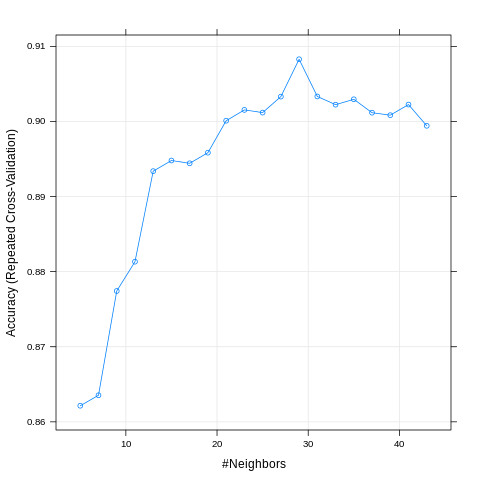

In [32]:
%%R
plot(knn_v1)
# O melhor k = 29

##Fazendo previsões

In [37]:
%%R
knnPredict <- predict(knn_v1, newdata = dados_teste_scaled)
knnPredict

  [1] Down Up   Up   Up   Down Up   Up   Down Up   Down Up   Up   Down Down Down
 [16] Up   Up   Up   Up   Up   Down Up   Up   Down Down Down Up   Down Up   Up  
 [31] Up   Up   Down Down Down Down Up   Down Up   Up   Down Up   Up   Down Down
 [46] Down Up   Up   Up   Up   Up   Down Up   Down Down Up   Down Up   Up   Up  
 [61] Down Down Down Down Up   Down Down Up   Up   Up   Down Down Up   Down Down
 [76] Up   Down Down Down Up   Down Up   Up   Down Up   Down Down Up   Down Up  
 [91] Up   Up   Up   Up   Up   Down Up   Down Up   Down Down Up   Down Up   Up  
[106] Down Down Down Down Up   Down Up   Down Down Down Down Down Down Down Down
[121] Up   Down Up   Down Down Up   Up   Up   Down Down Down Up   Up   Down Up  
[136] Down Up   Down Up   Down Up   Up   Up   Up   Up   Down Down Up   Up   Up  
[151] Up   Down Up   Down Down Up   Up   Down Up   Up   Down Up   Up   Up   Up  
[166] Up   Down Down Up   Down Down Up   Up   Down Up   Up   Up   Up   Down Up  
[181] Down Down Up   Down Up

##Criando **Confusion Matrix**

In [38]:
%%R
confusionMatrix(knnPredict, dados_teste$Direction)

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  119   3
      Up     31 159
                                          
               Accuracy : 0.891           
                 95% CI : (0.8511, 0.9233)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7802          
                                          
 Mcnemar's Test P-Value : 3.649e-06       
                                          
            Sensitivity : 0.7933          
            Specificity : 0.9815          
         Pos Pred Value : 0.9754          
         Neg Pred Value : 0.8368          
             Prevalence : 0.4808          
         Detection Rate : 0.3814          
   Detection Prevalence : 0.3910          
      Balanced Accuracy : 0.8874          
                                          
       'Positive' Class : Down            
                           

##Aplicando outras Métricas

In [40]:
%%R
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", 
                     repeats = 3, 
                     classProbs = TRUE, # retornar probabilidade de cada uma das classes
                     summaryFunction = twoClassSummary) # classificação binária

##Treinamento do Modelo

In [41]:
%%R

# mudar a métrica usada para calcular todos os resultados do modelo
knn_v2 <- train(Direction ~ ., 
                data = dados_treino_scaled, 
                method = "knn", 
                trControl = ctrl, 
                metric = "ROC", # Métrica ROC
                # preProcess = c("center","scale"),  # Isso é a normalização
                tuneLength = 20)

##Modelo KNN_v2



In [42]:
%%R
knn_v2

k-Nearest Neighbors 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 845, 844, 845, 844, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9396148  0.8407890  0.8860402
   7  0.9503120  0.8282931  0.9005244
   9  0.9569417  0.8364090  0.9101332
  11  0.9605227  0.8429952  0.9142574
  13  0.9671739  0.8570209  0.9231009
  15  0.9675336  0.8533333  0.9190193
  17  0.9672238  0.8518519  0.9224632
  19  0.9693994  0.8459098  0.9341128
  21  0.9719837  0.8444283  0.9327239
  23  0.9733303  0.8481643  0.9389031
  25  0.9737567  0.8504026  0.9395408
  27  0.9753607  0.8621900  0.9423611
  29  0.9755339  0.8600000  0.9485969
  31  0.9765474  0.8592432  0.9499575
  33  0.9772893  0.8584219  0.9506519
  35  0.9772544  0.8577295  0.9574830
  37  0.9767468  0.8459098  0.9513180
  39  0.9765452  0.8370370  0.9547477
  41  0.9772212  0.84

A métrica escolhida p/ o modelo impacta no resultado final do modelo. 


##Número de Vizinhos vs. Acurácia

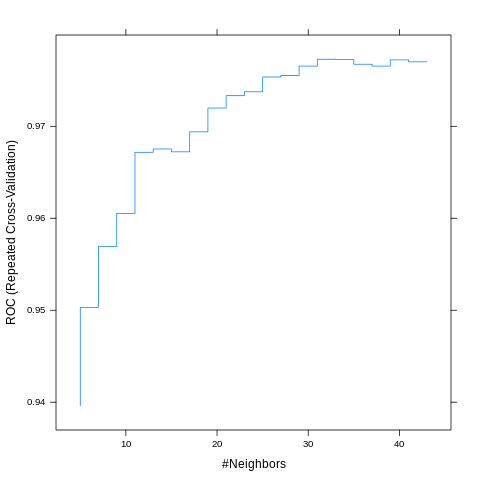

In [43]:
%%R
plot(knn_v2, print.thres = 0.5, type="S")

##Fazendo previsões


In [44]:
%%R
knnPredict <- predict(knn_v2, newdata = dados_teste_scaled)

##Criando Confusion Matrix

In [46]:
%%R

# Acurácia subiu p/ quase 90%
confusionMatrix(knnPredict, dados_teste$Direction)

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  121   3
      Up     29 159
                                          
               Accuracy : 0.8974          
                 95% CI : (0.8583, 0.9288)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7932          
                                          
 Mcnemar's Test P-Value : 9.897e-06       
                                          
            Sensitivity : 0.8067          
            Specificity : 0.9815          
         Pos Pred Value : 0.9758          
         Neg Pred Value : 0.8457          
             Prevalence : 0.4808          
         Detection Rate : 0.3878          
   Detection Prevalence : 0.3974          
      Balanced Accuracy : 0.8941          
                                          
       'Positive' Class : Down            
                           

##Previsões com novos dados

In [47]:
%%R
# Preparando dados de entrada
Year = c(2006, 2007, 2008)
Lag1 = c(1.30, 0.09, -0.654)
Lag2 = c(1.483, -0.198, 0.589)
Lag3 = c(-0.345, 0.029, 0.690)
Lag4 = c(1.398, 0.104, 1.483)
Lag5 = c(0.214, 0.105, 0.589)
Volume = c(1.36890, 1.09876, 1.231233)
Today = c(0.289, -0.497, 1.649)

In [48]:
%%R
novos_dados = data.frame(Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today)
novos_dados

  Year   Lag1   Lag2   Lag3  Lag4  Lag5   Volume  Today
1 2006  1.300  1.483 -0.345 1.398 0.214 1.368900  0.289
2 2007  0.090 -0.198  0.029 0.104 0.105 1.098760 -0.497
3 2008 -0.654  0.589  0.690 1.483 0.589 1.231233  1.649


In [49]:
%%R
str(novos_dados)

'data.frame':	3 obs. of  8 variables:
 $ Year  : num  2006 2007 2008
 $ Lag1  : num  1.3 0.09 -0.654
 $ Lag2  : num  1.483 -0.198 0.589
 $ Lag3  : num  -0.345 0.029 0.69
 $ Lag4  : num  1.398 0.104 1.483
 $ Lag5  : num  0.214 0.105 0.589
 $ Volume: num  1.37 1.1 1.23
 $ Today : num  0.289 -0.497 1.649


In [50]:
%%R
class(novos_dados)

[1] "data.frame"


##Normalizando dados

##Extraindo nomes das variáveis

In [51]:
%%R
nomes_variaveis <- colnames(novos_dados)
nomes_variaveis

[1] "Year"   "Lag1"   "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume" "Today" 


##Aplicando a função


In [52]:
%%R
novos_dados_scaled <- scale.features(novos_dados, nomes_variaveis)
novos_dados_scaled

  Year       Lag1        Lag2       Lag3       Lag4       Lag5      Volume
1   -1  1.0694055  1.02052862 -0.8961565  0.5214816 -0.3492321  1.00634702
2    0 -0.1575041 -0.97812219 -0.1825386 -1.1529531 -0.7785512 -0.99352976
3    1 -0.9119014 -0.04240643  1.0786951  0.6314715  1.1277832 -0.01281726
       Today
1 -0.1762273
2 -0.9001717
3  1.0763990


In [55]:
%%R
str(novos_dados_scaled)

'data.frame':	3 obs. of  8 variables:
 $ Year  : num [1:3, 1] -1 0 1
  ..- attr(*, "scaled:center")= num 2007
  ..- attr(*, "scaled:scale")= num 1
 $ Lag1  : num [1:3, 1] 1.069 -0.158 -0.912
  ..- attr(*, "scaled:center")= num 0.245
  ..- attr(*, "scaled:scale")= num 0.986
 $ Lag2  : num [1:3, 1] 1.0205 -0.9781 -0.0424
  ..- attr(*, "scaled:center")= num 0.625
  ..- attr(*, "scaled:scale")= num 0.841
 $ Lag3  : num [1:3, 1] -0.896 -0.183 1.079
  ..- attr(*, "scaled:center")= num 0.125
  ..- attr(*, "scaled:scale")= num 0.524
 $ Lag4  : num [1:3, 1] 0.521 -1.153 0.631
  ..- attr(*, "scaled:center")= num 0.995
  ..- attr(*, "scaled:scale")= num 0.773
 $ Lag5  : num [1:3, 1] -0.349 -0.779 1.128
  ..- attr(*, "scaled:center")= num 0.303
  ..- attr(*, "scaled:scale")= num 0.254
 $ Volume: num [1:3, 1] 1.0063 -0.9935 -0.0128
  ..- attr(*, "scaled:center")= num 1.23
  ..- attr(*, "scaled:scale")= num 0.135
 $ Today : num [1:3, 1] -0.176 -0.9 1.076
  ..- attr(*, "scaled:center")= num 0.48
  ..

In [54]:
%%R
class(novos_dados_scaled)

[1] "data.frame"


##Fazendo previsões

In [53]:
%%R
knnPredict <- predict(knn_v2, newdata = novos_dados_scaled)
cat(sprintf("\n Previsão de \"%s\" é \"%s\"\n", novos_dados$Year, knnPredict))


 Previsão de "2006" é "Down"
 
 Previsão de "2007" é "Down"
 
 Previsão de "2008" é "Up"
